In [7]:
#libraries
import pandas as pd
import numpy as np

#for plotting
import matplotlib.pyplot as plt
import seaborn as sb 
%matplotlib inline 

#define base colour 
base_color = sb.color_palette()[0]

import pandas_profiling

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [29]:
#read data 
logs = pd.read_csv ("C:/Users/user/Documents/Geopython Data File/GeoPython event - 10.05.2021/Data/logs_4wells.csv")
seismic_df = pd.read_csv ("C:/Users/user/Documents/Geopython Data File/GeoPython event - 10.05.2021/Data/seismic_4wells.csv")
section_stack = pd.read_csv ("C:/Users/user/Documents/Geopython Data File/GeoPython event - 10.05.2021/Data/section_2D_1.csv")


In [30]:
logs

Time  Density     P_wave  Porosity  V_clay  Water Saturation  \
0       514.8757   1.2545  1577.8733    0.0557  0.4820               1.0   
1       515.0686   1.2542  1579.8525    0.0550  0.4766               1.0   
2       515.2613   1.2724  1581.8326    0.0579  0.5014               1.0   
3       515.4538   1.2821  1583.8119    0.0592  0.5126               1.0   
4       515.6460   1.2897  1585.7920    0.0601  0.5201               1.0   
...          ...      ...        ...       ...     ...               ...   
74748  2788.0627   2.5312  2730.6299    0.1232  0.7761               1.0   
74749  2788.1743   2.4875  2727.8901    0.1487  0.7458               1.0   
74750  2788.2861   2.4531  2725.1487    0.1668  0.7255               1.0   
74751  2788.3979   2.4308  2722.4080    0.1769  0.7027               1.0   
74752  2788.5100   2.4300  2719.6682    0.1772  0.6997               1.0   

          log_ID Horison          Imp  
0       6507_2-1  2D-mid  1979.442055  
1       6507_2-1  2D-mid  1981.451006  
2       6507_2-1  2D-mid  2012.723800  
3       6507_2-1  2D-mid  2030.605237  
4       6507_2-1  2D-mid  2045.195942  
...          ...     ...          ...  
74748  6507_3-9S  2D-K65  6911.770403  
74749  6507_3-9S  2D-K65  6785.626624  
74750  6507_3-9S  2D-K65  6685.062276  
74751  6507_3-9S  2D-K65  6617.629366  
74752  6507_3-9S  2D-K65  6608.793726  

[74753 rows x 9 columns]

In [31]:
seismic_df

Time       Seismic    log_ID  QuadrTrace  SecDerInstAmpl  \
0        0.0  1.857250e-07  6507_2-4    0.000000        0.000003   
1        4.0  1.485800e-07  6507_2-4    0.000000        0.000003   
2        8.0 -4.952680e-08  6507_2-4    0.000000        0.000003   
3       12.0  1.981070e-07  6507_2-4    0.000000       -0.000003   
4       16.0  5.262220e-08  6507_2-4    0.000000        0.000003   
...      ...           ...       ...         ...             ...   
3292  3484.0  5.801160e+00  6507_2-2    3.549570       -0.025161   
3293  3488.0  2.199700e+00  6507_2-2    5.568090       -0.042255   
3294  3492.0 -1.175990e+00  6507_2-2    4.508560       -0.026934   
3295  3496.0 -3.029810e+00  6507_2-2    2.665140        0.034085   
3296  3500.0 -3.196830e+00  6507_2-2   -0.846052        0.078590   

        Integrated      AWCP           Der         AWF     DomF      InstF  \
0    -1.458270e-07 -0.002556 -3.714510e-08    0.435150  11.2305   0.587815   
1     2.364560e-08 -0.002496 -3.714510e-08    0.424978  11.2305  -0.586274   
2    -2.943440e-09 -0.002477 -1.981070e-07    0.421835  11.2305   0.573187   
3     2.088340e-07 -0.002418  2.476340e-07    0.411794  11.2305  -0.576099   
4     2.766920e-07 -0.002399 -1.454850e-07    0.408441  11.2305   0.564944   
...            ...       ...           ...         ...      ...        ...   
3292  6.979550e+00  5.798760 -1.829830e+00  172.873000  23.9258  26.082000   
3293  9.189250e+00  1.868830 -3.601460e+00  130.720000  23.9258  26.731100   
3294  8.030300e+00 -0.597739 -3.375690e+00   54.293700  23.9258  19.950700   
3295  5.024380e+00 -0.452218 -1.853820e+00  -10.679600  23.9258  -9.726790   
3296  1.848360e+00 -0.010231 -1.670140e-01   -5.916860  23.9258  -8.083670   

            SecDer    AmpEnv   AppPolr  
0     0.000000e+00  0.002723  0.002723  
1     0.000000e+00  0.002651  0.002651  
2    -1.609620e-07  0.002629  0.002629  
3     4.457410e-07  0.002558  0.002558  
4    -3.931190e-07  0.002535  0.002535  
...            ...       ...       ...  
3292 -3.220880e+00  6.628050  6.628050  
3293 -1.771630e+00  4.890190  4.890190  
3294  2.257690e-01  2.721400  2.721400  
3295  1.521870e+00  1.097960  1.097960  
3296  1.686810e+00  0.731952  0.731952  

[3297 rows x 14 columns]

In [32]:
section_stack

Time      DomF  Trace   AppPolr   Seismic       Der  QuadrTrace  \
0          0.0   2.44141    1.0  0.000000  0.000000  0.000000    0.006623   
1          4.0   2.44141    1.0  0.000000  0.000000  0.000000    0.006311   
2          8.0   2.44141    1.0  0.000000  0.000000  0.000000    0.007313   
3         12.0   2.44141    1.0  0.000000  0.000000  0.000000    0.007022   
4         16.0   2.44141    1.0  0.000000  0.000000  0.000000    0.008134   
...        ...       ...    ...       ...       ...       ...         ...   
993289  4984.0  11.22920  794.0  0.417634  0.330542 -0.092427    0.176002   
993290  4988.0  11.23050  794.0  0.357775  0.250767 -0.079775    0.120611   
993291  4992.0  11.23050  794.0  0.292691  0.236846 -0.013921    0.123388   
993292  4996.0  11.23050  794.0  0.237282  0.308537  0.071691    0.036278   
993293  5000.0  11.23050  794.0  0.171531  0.427340  0.118803    0.346980   

        SecDerInstAmpl  Integrated    AmpEnv   P_wave  Density       AWF  \
0             0.000092    0.039672  0.006610  1479.19  1.20252  0.001842   
1             0.000092    0.051413  0.006219  1479.19  1.20252  0.001833   
2             0.000092    0.063827  0.007301  1479.19  1.20252  0.001856   
3            -0.000091    0.076711  0.006932  1479.19  1.20252  0.001849   
4             0.000097    0.089974  0.008122  1479.19  1.20252  0.001867   
...                ...         ...       ...      ...      ...       ...   
993289       -0.000378    1.420740  0.417634  4865.46  2.69136  0.331198   
993290       -0.001149    1.680460  0.357775  4879.07  2.69136  0.215173   
993291       -0.000327    1.949060  0.292691  4892.68  2.69136  0.119895   
993292        0.000605    2.312900  0.237282  4906.29  2.68547  0.046883   
993293       -0.000646    2.815230  0.171531  4919.90  2.68547  0.001767   

          SecDer      AWCP     InstF Horison           Imp  
0       0.000000  0.001842   6.65428   2D-wb   1778.755559  
1       0.000000  0.001833  -7.25468   2D-wb   1778.755559  
2       0.000000  0.001856   6.34233   2D-wb   1778.755559  
3       0.000000  0.001849  -6.86129   2D-wb   1778.755559  
4       0.000000  0.001867   6.01937   2D-wb   1778.755559  
...          ...       ...       ...     ...           ...  
993289 -0.027118  0.331198  10.87850  bottom  13094.704426  
993290  0.012652  0.215173  10.12870  bottom  13131.333835  
993291  0.065853  0.119895   8.27151  bottom  13167.963245  
993292  0.085613  0.046883   9.53726  bottom  13175.694606  
993293  0.047111  0.001767   3.96665  bottom  13212.243853  

[993294 rows x 18 columns]

In [33]:
logs.isna().sum()

Time                0
Density             0
P_wave              0
Porosity            0
V_clay              0
Water Saturation    0
log_ID              0
Horison             0
Imp                 0
dtype: int64

In [34]:
seismic_df.isna().sum()

Time              0
Seismic           0
log_ID            0
QuadrTrace        0
SecDerInstAmpl    0
Integrated        0
AWCP              0
Der               0
AWF               0
DomF              0
InstF             0
SecDer            0
AmpEnv            0
AppPolr           0
dtype: int64

In [35]:
section_stack.isna().sum()

Time              0
DomF              0
Trace             0
AppPolr           0
Seismic           0
Der               0
QuadrTrace        0
SecDerInstAmpl    0
Integrated        0
AmpEnv            0
P_wave            0
Density           0
AWF               0
SecDer            0
AWCP              0
InstF             0
Horison           0
Imp               0
dtype: int64

In [36]:
pandas_profiling.ProfileReport(logs)

In [37]:
def plot_per_log(df, column_name, type_p='-', color=base_color):
    # plot Time vs Parameter for each well on separate subgraph
    log_ID_list=df['log_ID'].value_counts().index.tolist()
    fig, ax = plt.subplots(1,len(log_ID_list),figsize=(15,10))

    for i in list(range(len(log_ID_list))):
        ax[i].plot(df[df['log_ID']==log_ID_list[i]][column_name], -df[df['log_ID']==log_ID_list[i]].Time, 
                   type_p, color=color)
        ax[i].set_xlabel(column_name);
        ax[i].set_title(log_ID_list[i]); 
    
    ax[0].set_ylabel('Time');

In [51]:
def plot_per_log(df, column_name, type_p='-', color= base_color):
    #plot Time vs Parameter for each well on seperate subgraph
    log_ID_list = df['log_ID'].value_counts().index.tolist()
    fig, ax = plt.subplots(1,len(log_ID_list),figsize=(15,10))
    
    for i in list(range(len(log_ID_list))):
        ax[i].plot(df[df['log_ID']==log_ID_list[i]][column_name], -df[df['log_ID']==log_ID_list[i]].Time,
                  type_p, color=color)
        ax[i].set_xlabel(column_name)
        ax[i].set_title(log_ID_list[i]);
        
    ax[0].set_ylabel('Time');

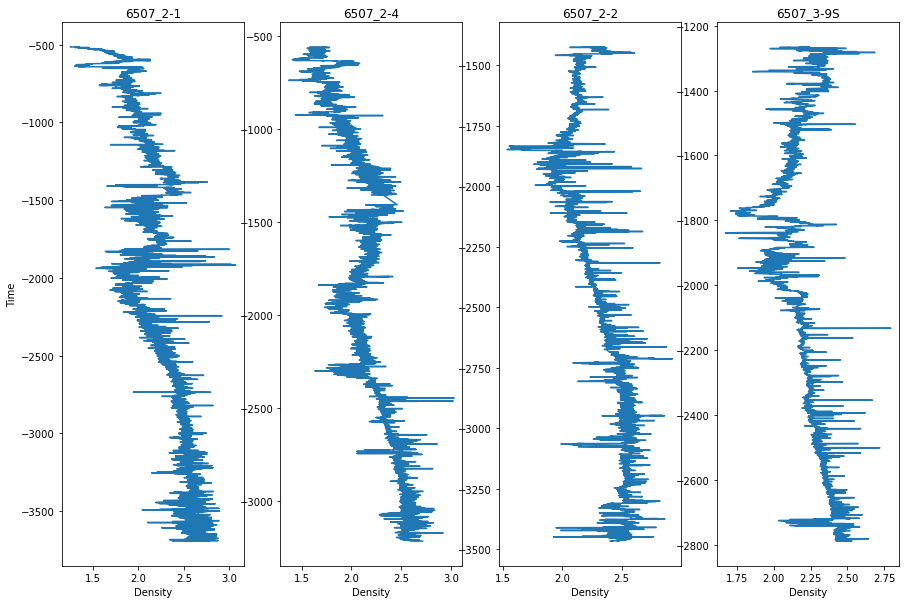

In [52]:
plot_per_log(logs, 'Density')

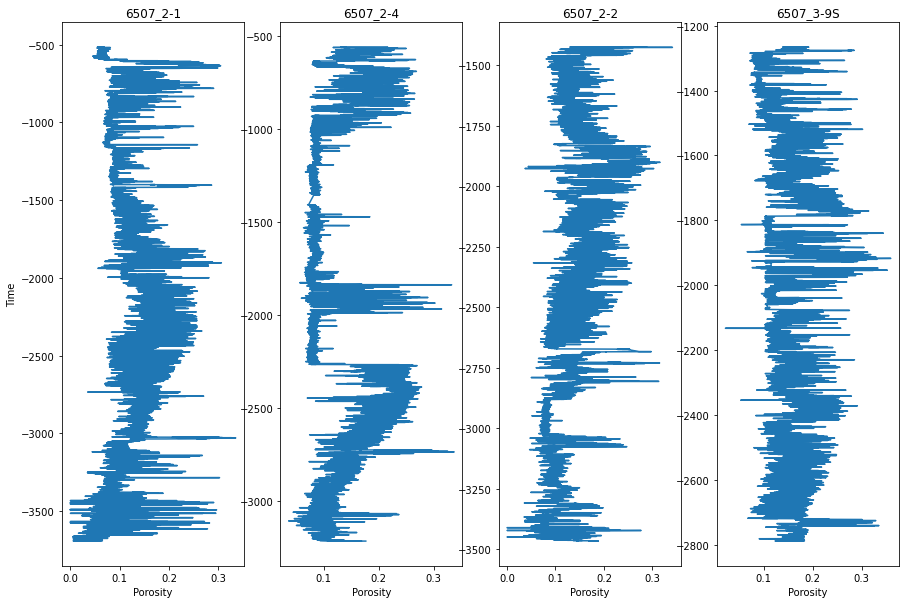

In [53]:
plot_per_log(logs, 'Porosity')

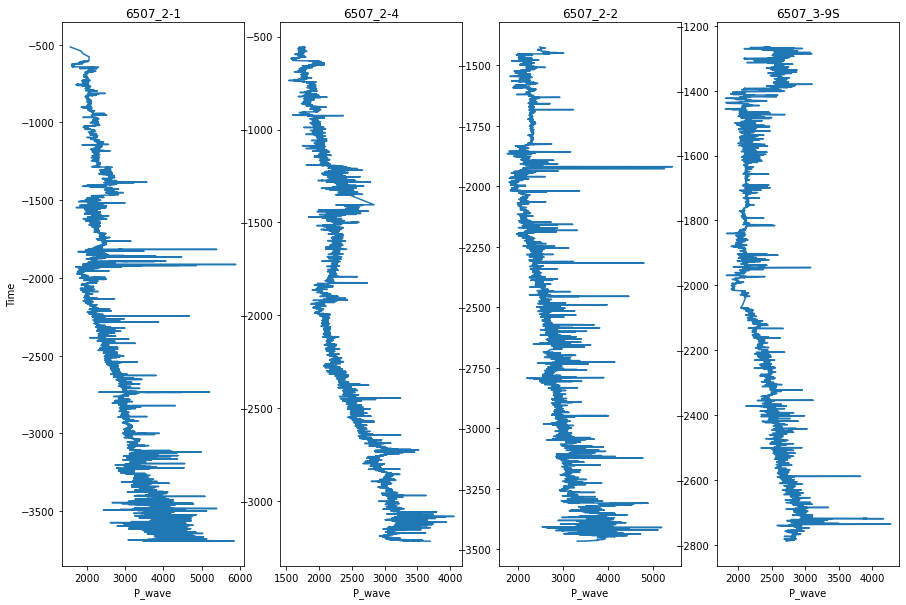

In [55]:
plot_per_log(logs, 'P_wave')

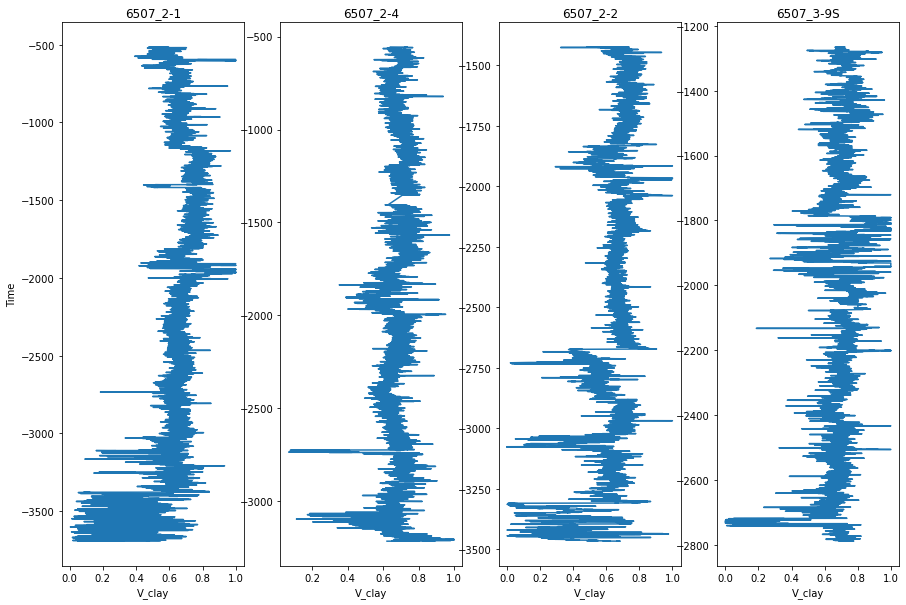

In [56]:
plot_per_log(logs, 'V_clay')

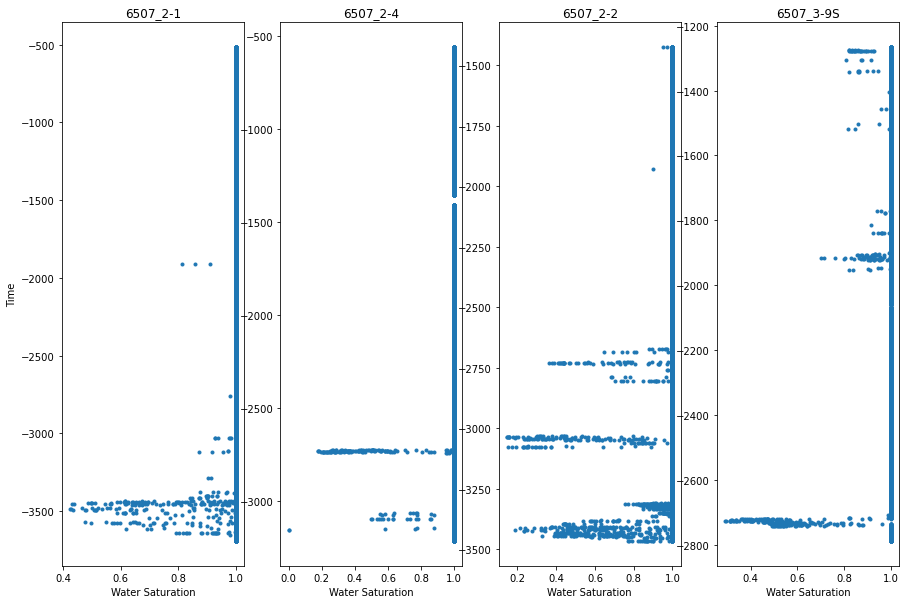

In [59]:
plot_per_log(logs, 'Water Saturation', '.')

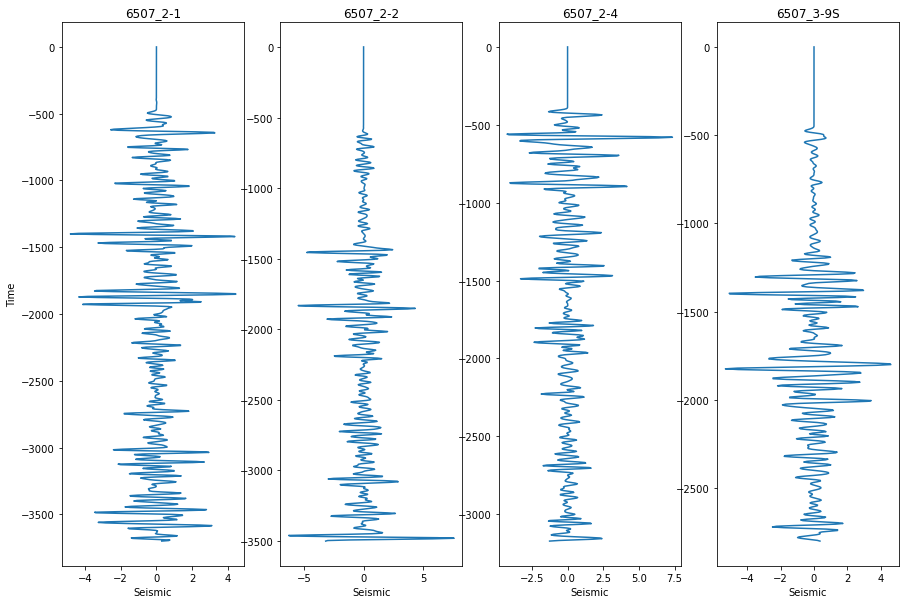

In [61]:
plot_per_log(seismic_df, 'Seismic', '-')

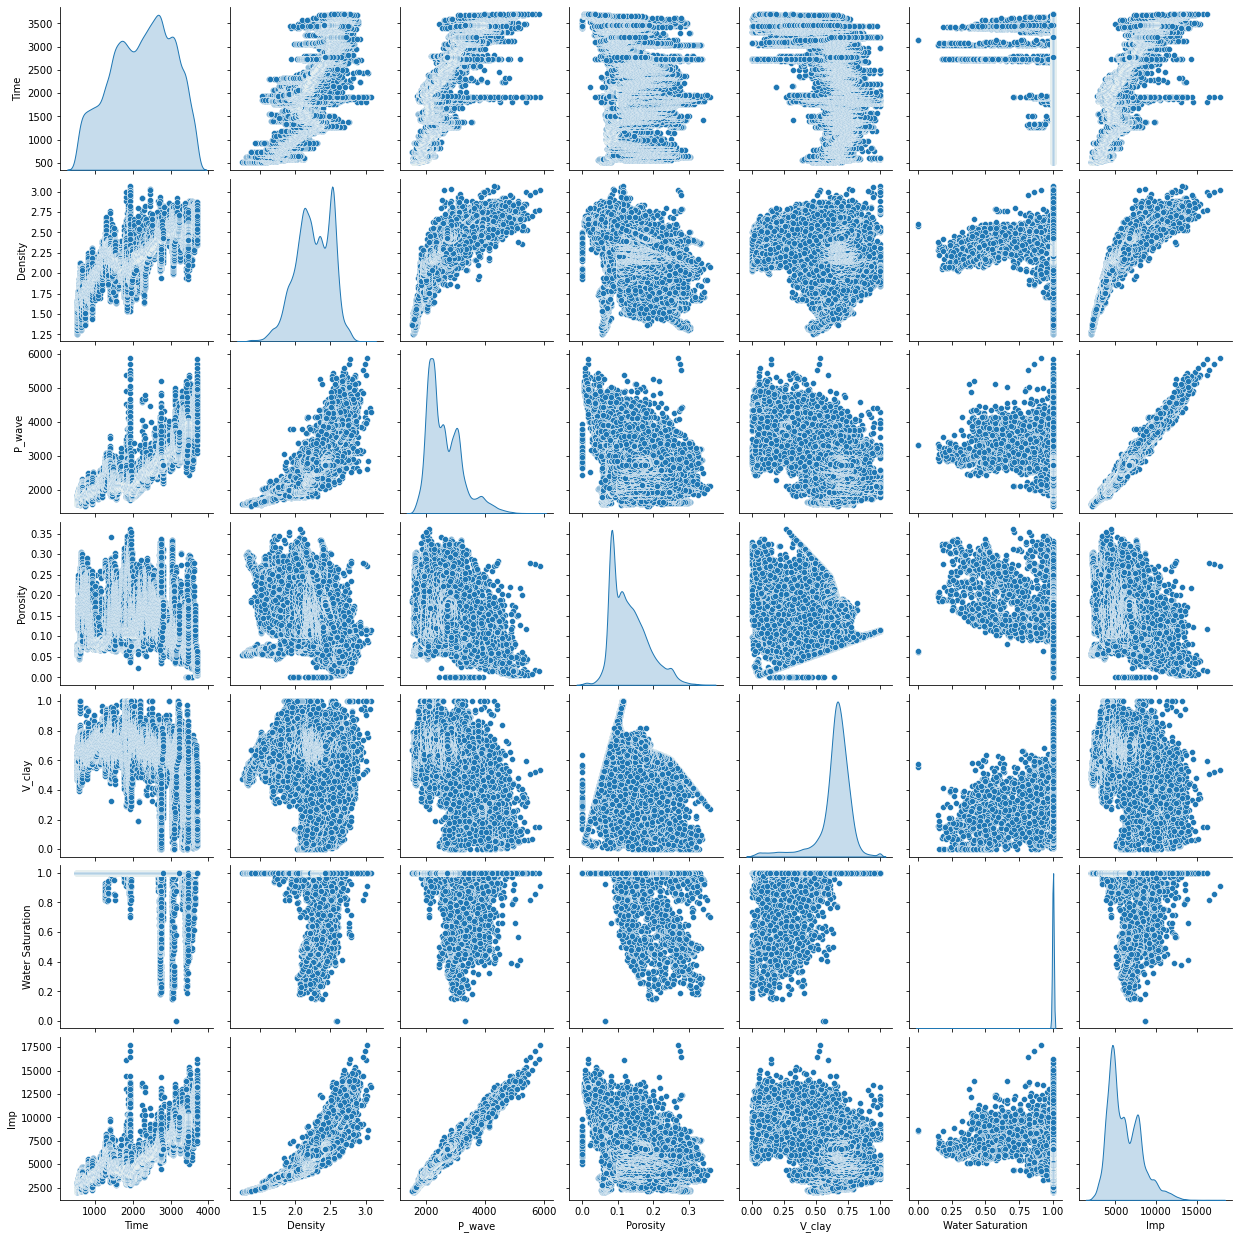

In [63]:
sb.pairplot(logs, diag_kind = 'kde');

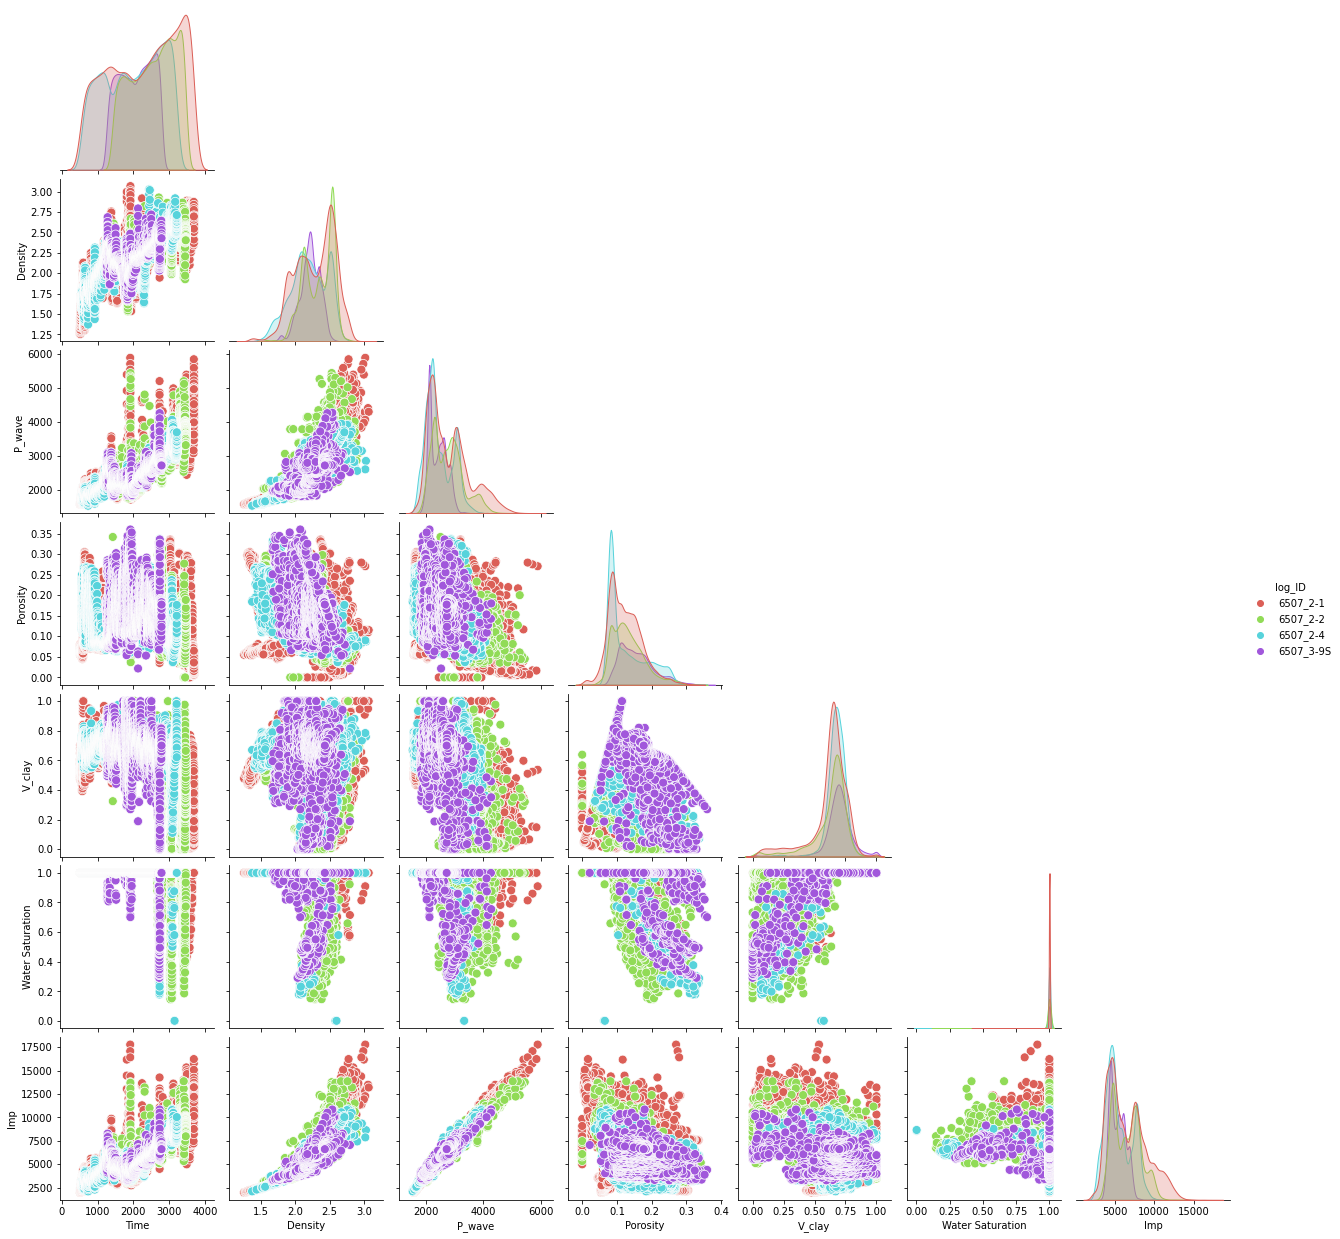

In [64]:
 # uncomment this line, running time few minutes

sb.pairplot(logs, hue='log_ID', palette="hls" ,plot_kws={'s':80}, corner=True);

In [65]:
# log dataframes and seismic dataframe frames has different time steps Moving average on logs

In [68]:
seismic_df[seismic_df['log_ID']=='6507_2-1'].head()

Time       Seismic    log_ID  QuadrTrace  SecDerInstAmpl    Integrated  \
794   0.0 -7.548390e-08  6507_2-1    0.002513        0.000018 -5.314120e-07   
795   4.0 -1.006450e-07  6507_2-1    0.002343        0.000018 -6.413220e-07   
796   8.0  3.302420e-08  6507_2-1    0.002429        0.000018 -6.156090e-07   
797  12.0  3.774200e-08  6507_2-1    0.002264       -0.000017 -5.861930e-07   
798  16.0  8.491930e-08  6507_2-1    0.002347        0.000017 -5.050610e-07   

         AWCP           Der       AWF     DomF    InstF        SecDer  \
794 -0.000959 -2.516130e-08  0.008822  20.0195  5.45333  0.000000e+00   
795 -0.000927 -2.516130e-08 -0.008777  20.0195 -5.94561  0.000000e+00   
796 -0.000958  1.336690e-07  0.008743  20.0195  5.41126  1.588310e-07   
797 -0.000926  4.717740e-09 -0.008707  20.0195 -5.90072 -1.289520e-07   
798 -0.000958  4.717740e-08  0.008656  20.0195  5.36106  4.245970e-08   

       AmpEnv       AppPolr  
794  0.001618 -1.617760e-03  
795  0.001476 -1.006450e-07  
796  0.001616  1.615640e-03  
797  0.001476  3.774200e-08  
798  0.001615  1.614630e-03

In [69]:
logs[logs['log_ID'] == '6507_2-1'].head()

Time  Density     P_wave  Porosity  V_clay  Water Saturation    log_ID  \
0  514.8757   1.2545  1577.8733    0.0557  0.4820               1.0  6507_2-1   
1  515.0686   1.2542  1579.8525    0.0550  0.4766               1.0  6507_2-1   
2  515.2613   1.2724  1581.8326    0.0579  0.5014               1.0  6507_2-1   
3  515.4538   1.2821  1583.8119    0.0592  0.5126               1.0  6507_2-1   
4  515.6460   1.2897  1585.7920    0.0601  0.5201               1.0  6507_2-1   

  Horison          Imp  
0  2D-mid  1979.442055  
1  2D-mid  1981.451006  
2  2D-mid  2012.723800  
3  2D-mid  2030.605237  
4  2D-mid  2045.195942

In [70]:
# copy logs df
logs_av = logs

# add column rounded time (/4)
logs_av['Time_rounded']=np.round(logs_av['Time']/4)*4

horison_vect=logs_av.groupby(['log_ID', 'Time_rounded'])['Horison'].first().values
logs_av=logs_av.groupby(['log_ID', 'Time_rounded']).mean()
# add horison (the first value of horison in Time_rounded)
logs_av['Horison']=horison_vect

logs_av.reset_index(inplace=True)
logs_av.drop('Time', axis=1, inplace=True)
logs_av=logs_av.rename(columns={'Time_rounded':'Time'})

In [72]:
#copy Logs df
logs_av = logs

#add column rounded time (/4)
logs_av['Time_rounded']=np.round(logs_av['Time'] /4)*4

horison_vect=logs_av.groupby(['log_ID', 'Time_rounded'])['Horison'].first().values
logs_av=logs_av.groupby(['log_ID', 'Time_rounded']).mean()
#add horison (the first value of horison in Time_rounded)
logs_av['Horison']=horison_vect

logs_av.reset_index(inplace=True)
logs_av.drop('Time', axis=1, inplace=True)
logs_av=logs_av.rename(columns={'Time_rounded': 'Time'})


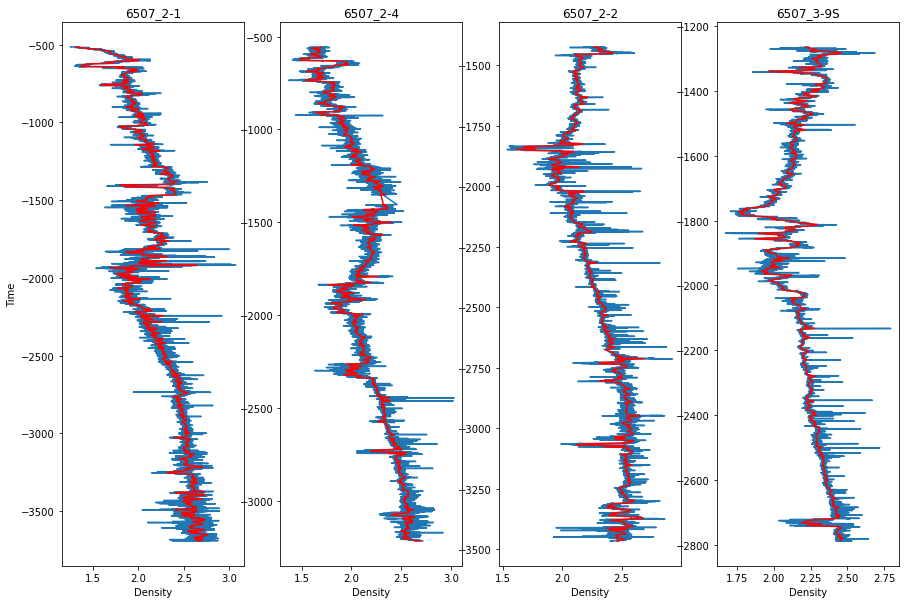

In [77]:
#plot Time vs parameter for each well on seperate subgroup

column_name='Density'
log_ID_list=logs['log_ID'].value_counts().index.tolist()
fig, ax = plt.subplots(1,len(log_ID_list), figsize=(15,10))

for i in list(range(len(log_ID_list))):
    ax[i].plot(logs[logs['log_ID']==log_ID_list[i]][column_name], -logs[logs['log_ID']==log_ID_list[i]].Time,
              '-', color=base_color)
    ax[i].plot(logs_av[logs_av['log_ID']==log_ID_list[i]][column_name], -logs_av[logs_av['log_ID']==log_ID_list[i]]. Time, 
             '-', color = 'red')
    ax[i].set_xlabel(column_name);
    ax[i].set_title(log_ID_list[i]);
    
ax[0].set_ylabel('Time');

In [78]:
# combine logs_av and seismic_df

log_seismic_df = pd.merge(logs_av, seismic_df, on = ['log_ID', 'Time'])

In [79]:
log_seismic_df['log_ID'].value_counts()

6507_2-1     795
6507_2-4     643
6507_2-2     510
6507_3-9S    381
Name: log_ID, dtype: int64

In [80]:
# log_seismic_df.isna().sum()

log_ID              0
Time                0
Density             0
P_wave              0
Porosity            0
V_clay              0
Water Saturation    0
Imp                 0
Horison             0
Seismic             0
QuadrTrace          0
SecDerInstAmpl      0
Integrated          0
AWCP                0
Der                 0
AWF                 0
DomF                0
InstF               0
SecDer              0
AmpEnv              0
AppPolr             0
dtype: int64

In [81]:
#Find overlapping columns between wells data and 2D data

features = (log_seismic_df.columns).intersection(section_stack.columns).to_list()
print(features)


['Time', 'Density', 'P_wave', 'Imp', 'Horison', 'Seismic', 'QuadrTrace', 'SecDerInstAmpl', 'Integrated', 'AWCP', 'Der', 'AWF', 'DomF', 'InstF', 'SecDer', 'AmpEnv', 'AppPolr']


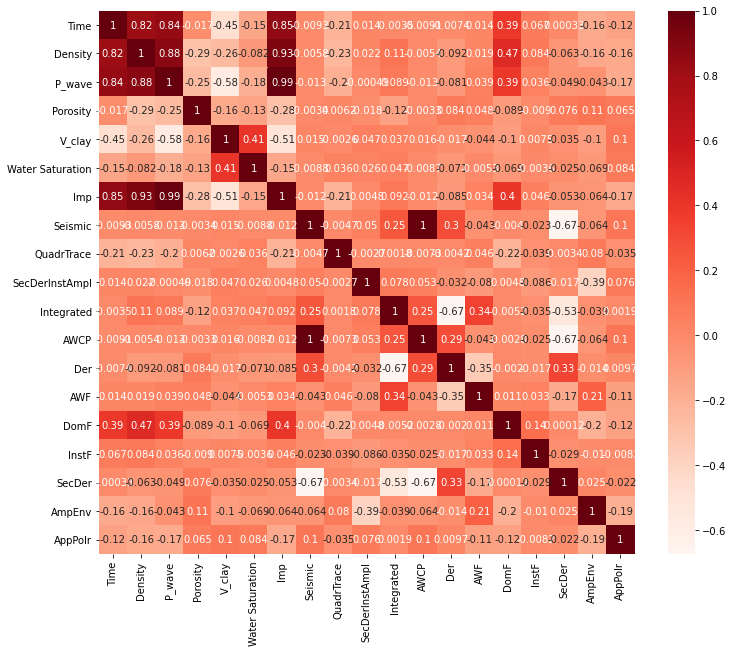

In [82]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = log_seismic_df.corr()
sb.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

ValueError: list.remove(x): x not in list

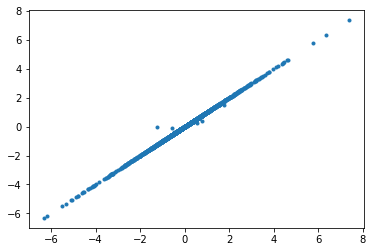

In [89]:
# we might want to get rid of AWCP as it is highly correlated with Seismic
plt.plot(log_seismic_df['Seismic'], log_seismic_df['AWCP'], '.')
# remove AWCP
features.remove('AWCP')
